In [3]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load the resume dataset
raw_df = pd.read_csv('ResumeDataSet.csv')

# Create a copy of the dataset
df = raw_df.copy()

# Function to clean the text in the 'Resume' column
def clean_resume(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'<[^>]+>', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    return text.strip()

# Apply normalization
df['cleaned_resume'] = df['Resume'].apply(clean_resume)
# Initialize a LabelEncoder to encode 'Category'
le = LabelEncoder()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Exploration

In [4]:
# View first few rows
print(df.head())

# Dataset shape
print("Shape:", df.shape)

# Column types and non-null counts
print(df.info())

# Count missing values
print(df.isnull().sum())

       Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

                                      cleaned_resume  
0  skills   programming languages  python  pandas...  
1  education details may  to may  b e uit rgpv da...  
2  areas of interest deep learning  control syste...  
3  skills â   r â   python â   sap hana â   table...  
4  education details mca ymcaust  faridabad  hary...  
Shape: (962, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    obje

In [5]:
# Unique job categories
print("Unique categories:", df['Category'].nunique())

# Count per category
print(df['Category'].value_counts())


Unique categories: 25
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


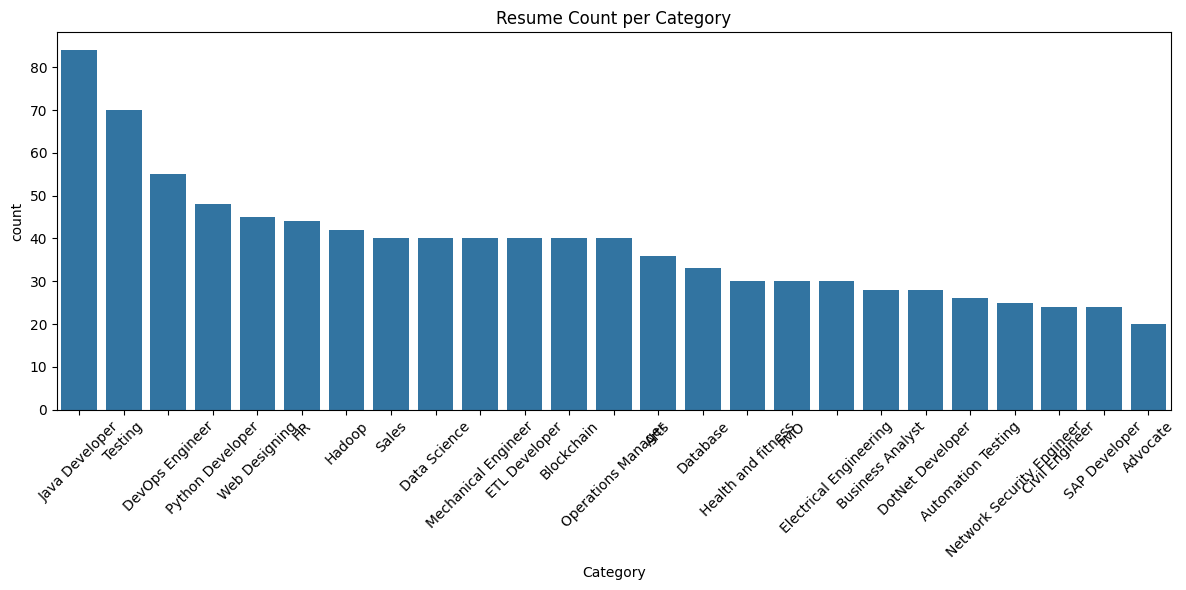

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title("Resume Count per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

count     962.000000
mean      450.497921
std       415.868459
min        19.000000
25%       166.000000
50%       329.000000
75%       589.250000
max      2209.000000
Name: resume_length, dtype: float64


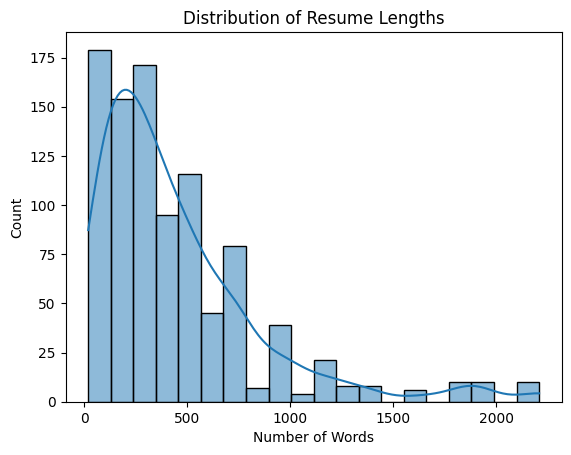

In [7]:
# Add a column for resume word count
df['resume_length'] = df['Resume'].apply(lambda x: len(str(x).split()))

# Basic stats
print(df['resume_length'].describe())

# Plot distribution
sns.histplot(df['resume_length'], bins=20, kde=True)
plt.title("Distribution of Resume Lengths")
plt.xlabel("Number of Words")
plt.show()


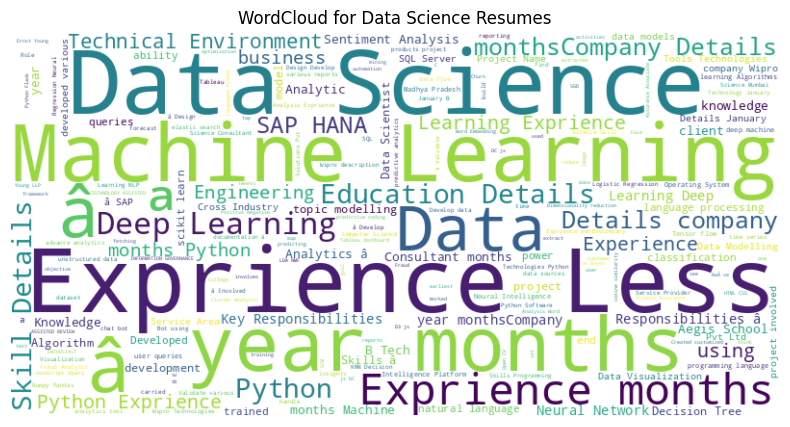

In [8]:
# Example for one category
text = " ".join(df[df['Category'] == 'Data Science']['Resume'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Data Science Resumes")
plt.show()

# Data Processing

In [9]:
# Remove exact duplicate rows
df = df.drop_duplicates()

# Optional: Remove duplicates in the 'resume' column only
df = df.drop_duplicates(subset='Resume')


In [ ]:
# Normalization
def clean_resume(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'<[^>]+>', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    return text.strip()

# Apply normalization
df['cleaned_resume'] = df['Resume'].apply(clean_resume)

In [10]:
# extra normalization
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['cleaned_resume'] = df['cleaned_resume'].apply(remove_stopwords)


# Implement the Machine Learning Models

In [11]:
# 1. TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['cleaned_resume'])
y = df['Category']


In [34]:
# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100, stratify=y
)

In [35]:
# 3. Train Logistic Regression
log_model = LogisticRegression(max_iter=100)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

In [36]:
# 4. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [37]:
# 5. Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=1))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()




=== Logistic Regression ===
Accuracy: 0.7647058823529411

Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         2
                     Arts       1.00      1.00      1.00         1
       Automation Testing       1.00      1.00      1.00         2
               Blockchain       1.00      0.00      0.00         1
         Business Analyst       1.00      0.00      0.00         1
           Civil Engineer       1.00      1.00      1.00         1
             Data Science       0.67      1.00      0.80         2
                 Database       0.33      1.00      0.50         2
          DevOps Engineer       1.00      0.00      0.00         2
         DotNet Developer       1.00      1.00      1.00         1
            ETL Developer       1.00      1.00      1.00         1
   Electrical Engineering       1.00      1.00      1.00         1
                       HR       1.00      1.0

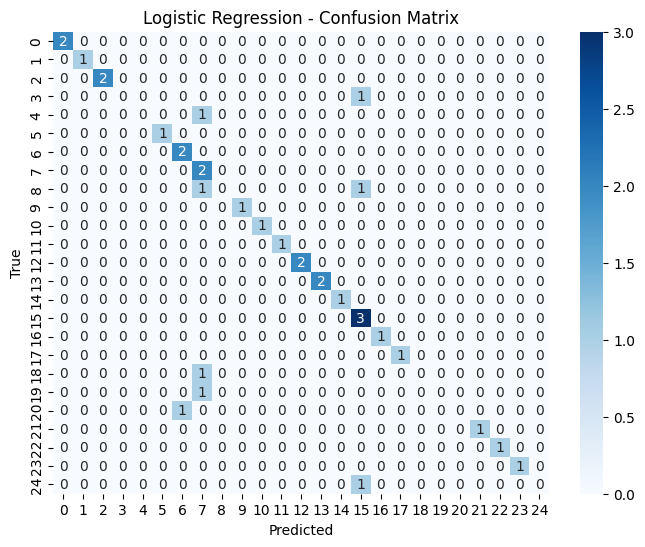


=== Random Forest ===
Accuracy: 0.9117647058823529

Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         2
                     Arts       1.00      1.00      1.00         1
       Automation Testing       1.00      1.00      1.00         2
               Blockchain       1.00      1.00      1.00         1
         Business Analyst       1.00      1.00      1.00         1
           Civil Engineer       1.00      1.00      1.00         1
             Data Science       1.00      1.00      1.00         2
                 Database       1.00      1.00      1.00         2
          DevOps Engineer       0.67      1.00      0.80         2
         DotNet Developer       0.50      1.00      0.67         1
            ETL Developer       1.00      1.00      1.00         1
   Electrical Engineering       0.50      1.00      0.67         1
                       HR       1.00      1.00     

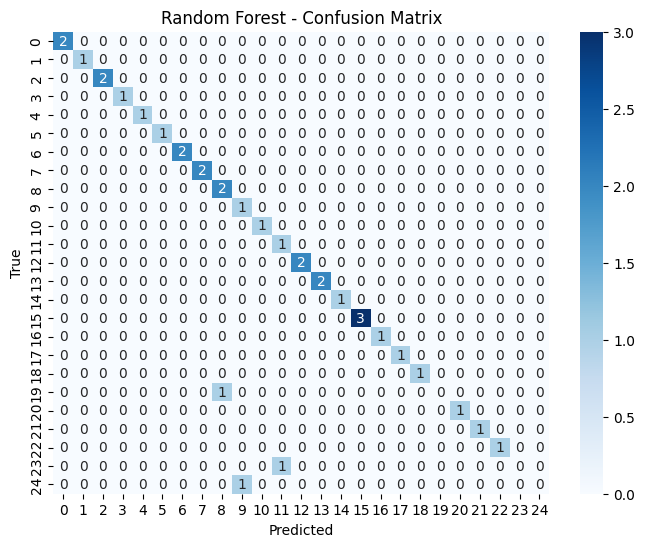

In [38]:
# 6. Evaluate both models
evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Random Forest", y_test, rf_preds)